# Clustering
Clustering, or unsupervised learning is a classification method with no class labels. Clustering aims to estimate the labels of the training data. 


## Hierarchical clustering and dendrogram
Hierarchical clustering makes groups in a specific order. The next step of the algorithm is the merge (or split) of the pervious step. The merge (or split) is implemented using a specific metric, often based on the Euclidean distance. Let's start with the data already generated in chapter 3. 

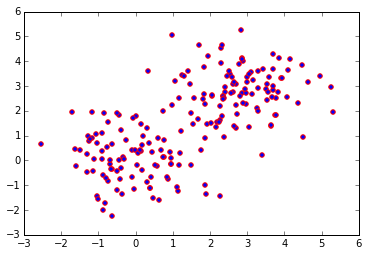

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
np.random.seed(0)
n=100
X=np.vstack((np.random.multivariate_normal([0,0],[[1,0],[0,1]] ,n), 
             np.random.multivariate_normal([3,3],[[1,0],[0,1]] ,n)))
#Y =np.array([0] * n + [1] * n) 
#There is no data label
plt.scatter(X[:,0], X[:,1], edgecolors="r")

##Fitting hierarchical clustering 
Now we implement agglomerative clustering using the average linkage.

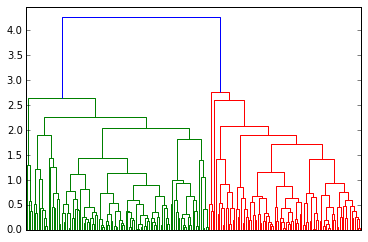

In [2]:
import scipy.cluster.hierarchy as AHC
X_dist=AHC.distance.pdist(X) #make the pairwise distance
X_linkage=AHC.linkage(X_dist,method="average")
den=AHC.dendrogram(X_linkage,no_labels=True)


# Fitting K-Means
The k-means algorithm is one of the most efficient clustering techniques. It starts with some initial value, often $k$ random samples of the observations. Then, iteratively clusters the closest observations to the mean, and then updates the cluster mean accordingly.

In [3]:
from sklearn import cluster
X_kmeans=cluster.KMeans(n_clusters=2)
X_kmeans.fit(X)
X_labels=X_kmeans.labels_
X_centers=X_kmeans.cluster_centers_

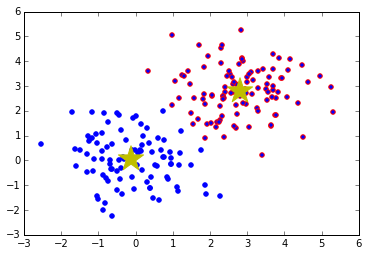

In [4]:
index=X_labels==0
plt.scatter(X[index,0], X[index,1], edgecolors="r")
plt.scatter(X[~index,0], X[~index,1], edgecolors="b")
plt.scatter(X_centers[:,0], X_centers[:,1], edgecolors="y", facecolor="y",marker="*",s=700)


## Image processing application
Now we try kmeans on the grayscale cat image of chapter 2 and segment the image.

(-0.5, 492.5, 334.5, -0.5)

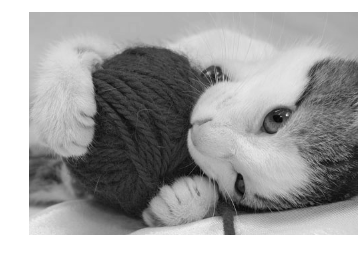

In [5]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
#url=url="http://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/is_my_cat_normal_slideshow/photolibrary_rf_photo_of_cat_eating_red_yarn.jpg"
img = plt.imread("../data/cat1.jpg")
img_tinted = img * [.27, .72, 0.07]
cat=np.sum(img_tinted, axis=2)
plt.imshow(cat, "gray")
plt.axis("off")

In [6]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering as AHC
X=np.reshape(cat,(-1,1))

img_graph=grid_to_graph(*cat.shape)
k=5
ward=AHC(n_clusters=k,linkage="ward",connectivity=img_graph).fit(X)
cat_segment=np.reshape(ward.labels_,cat.shape)

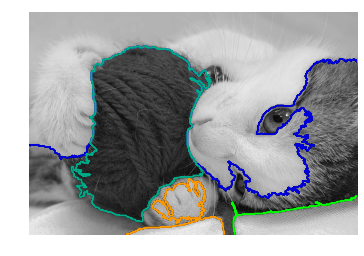

In [7]:
plt.imshow(cat, "gray")
plt.axis("off")
for l in range(k):
    plt.contour(cat_segment==l,contours=1,colors=[plt.cm.spectral(l/float(k)),])
